# The I-94 Traffic Dataset

In this project we will be analysing the data on traffic at the I-94 Interstate. The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [3]:
#read in the file using pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
Traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [4]:
Traffic.head() #examines the first five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
Traffic.tail() #examines the last 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
Traffic.info() #find more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Analysing Traffic Volume

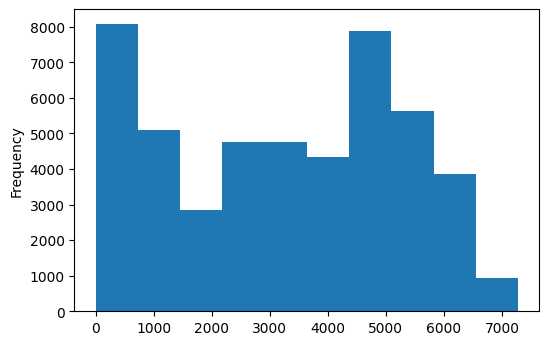

In [7]:
Traffic["traffic_volume"].plot.hist() #plot a histogram using the Pandas method

In [8]:
Traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The hourly traffic volume varies from 0 to 7280 cars, with an average of 3260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

# Traffic Volume: Day vs. Night

In this section we will devide the dataset into two parts:
* Daytime data: hours from 7am - 7pm
* Nighttime data: hours from 7pm - 7am

In [9]:
Traffic["date_time"] = pd.to_datetime(Traffic["date_time"])

In [11]:
#isolate the daytime data
day = Traffic[(Traffic["date_time"].dt.hour >= 7) & (Traffic["date_time"].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [12]:
#isolate the nighttime data
night = Traffic[(Traffic["date_time"].dt.hour >= 19) | (Traffic["date_time"].dt.hour < 7)]
print(night.shape)

(24327, 9)


There is a significant difference in row numbers between `day` and `night`, this may be due to a few hours of missing data.

# Traffic Volume: Day vs. Night (II)

This section will compare the traffic volume at night and during the day with two histograms side-by-side on a grid chart

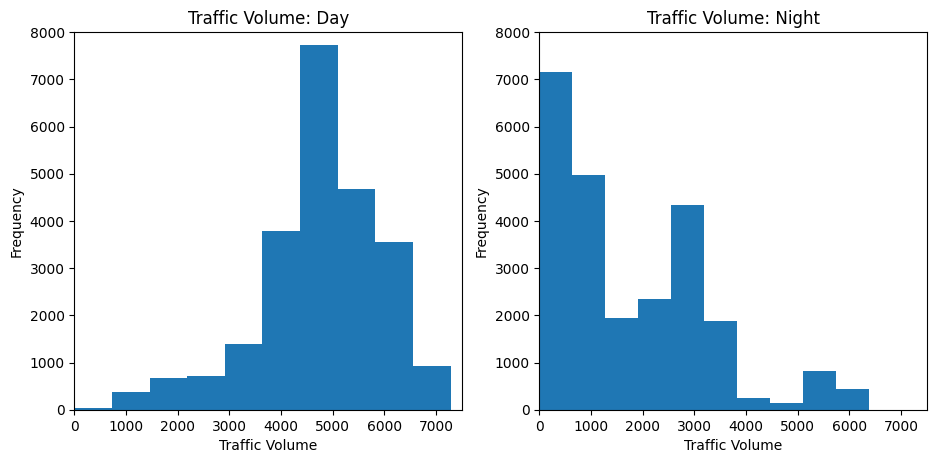

In [21]:
plt.figure(figsize =(11,5))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.show()

In [22]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [23]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram showing the distribution of traffic volume during the day is left skewed meaning most of the traffic volume values are high. The statistic descriptions shows 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252)

The histogram showing the distribution of traffic volume during the night is right skewed meaning most of the traffic volume values are low. The statistic descriptions shows 75% of the time, the number of cars that pass the station each hour was less than 2,819, therefore traffic at night is generally light.

As our goal is to find indicators of heavy traffic, we will only be using the day time data going forward.

# Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the Week
* Time of day

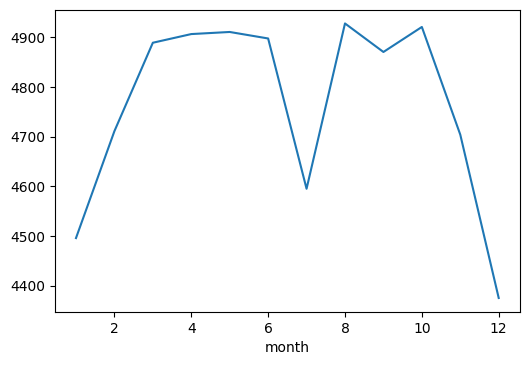

In [32]:
day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The line graph shows less heavy traffic during the Winter (November - February) and increases during warmer Months - except in July where there is a sharp dip in Traffic. 

# Time Indicators (II)

We'll now continue with building line plots for another time unit: day of the week.

In [35]:
day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

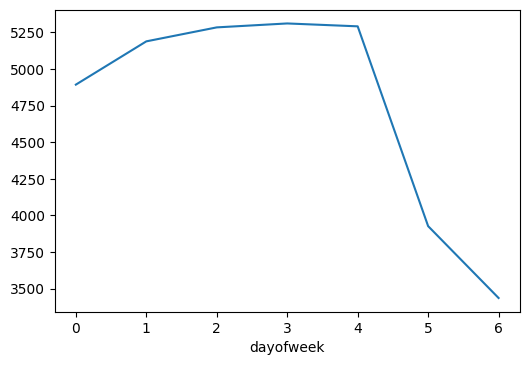

In [36]:
by_dayofweek["traffic_volume"].plot.line()
plt.show()

Traffic volume is heavier between Monday - Friday (typical working days) and lighter on the weekends, with values below 4000 cars

# Time Indicators (III)

Above, we found that the traffic volume is significantly heavier on business days compared to the weekends.

Now we will generate a line plot for the time of day. We will look at the averages for the weekdays and weekend seperately as the weekends will drag down the average values. To do this, we will split the data based on the day types:
* Weekday
* Weekend

In [39]:
day['date_time'].dt.hour
weekday = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_weekday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


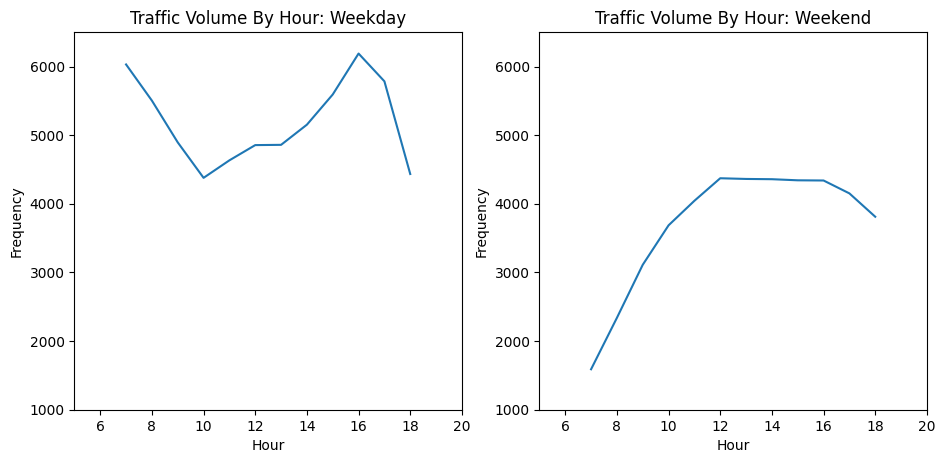

In [43]:
plt.figure(figsize =(11,5))
plt.subplot(1, 2, 1)
by_hour_weekday["traffic_volume"].plot.line()
plt.title("Traffic Volume By Hour: Weekday")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xlim(5, 20)
plt.ylim(1000, 6500)

plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume By Hour: Weekend")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xlim(5, 20)
plt.ylim(1000, 6500)

plt.show()

The graph above shows traffic volume is generally higher during business days compared to weekends. As expected, the rush hours are around 7AM and 16PM - typically the hours people are travelling to and from work

In summary, we have reached the following conclusions:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

# Weather Indicators
nother possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`

Some of these columns are numerical and we will start by looking at their correlation values with `traffic_volume`

In [44]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of +0.13. Other relevant columns include `rain_1h`, `snow_1h`, `clouds_all` which do not show a strong correlation with traffic volume.

Below we will generate a scatter plot to visualise the correlation between `temp` and `traffic_volume`

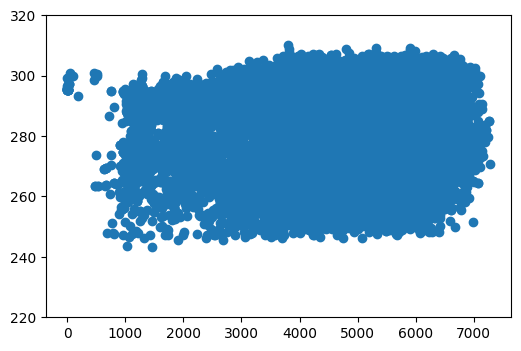

In [47]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim(220, 320)
plt.show()

From the graph above, we can conclude, that temperature doesn't look like a solid indicator of heavy traffic

# Weather Types

In this section we will look at the categorical weather-related columns: `weather_main` and `weather_description`

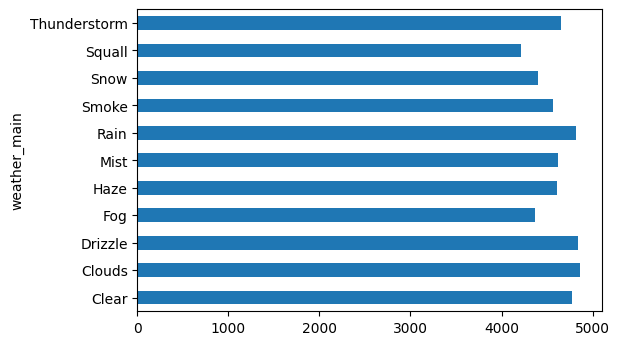

In [50]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh()
plt.show()

The image above shows no weather type exceeeds 5,000 cars so we will look at a bar chart looking at weather descriptions

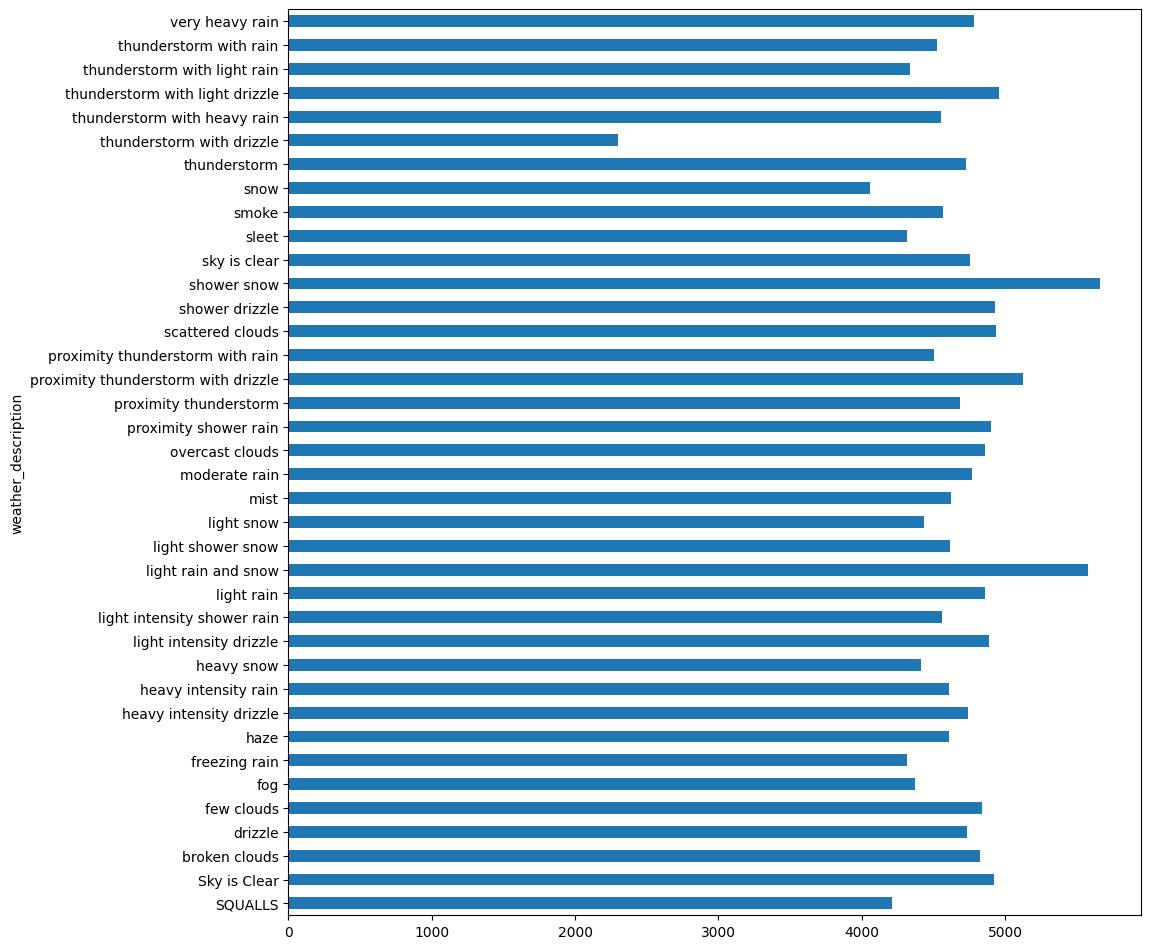

In [53]:
by_weather_description = day.groupby('weather_description').mean()
plt.figure(figsize=(11,12))
by_weather_description["traffic_volume"].plot.barh()
plt.show()

In the graph above, there are three weather types where traffic volume exceeds 5,000:
* Shower Snow
* Light rain and snow 
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusions

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
* Time indicators
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7 and 16.

* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle